In [1]:
import pandas as pd

df = pd.read_csv('D:/ML Projects/Smart Energy Usage Pattern Detector/data/processed/processed_data.csv')

In [2]:
numerical_cols = [
 'Global_active_power',
 'Global_reactive_power',
 'Voltage',
 'Global_intensity',
 'Sub_metering_1',
 'Sub_metering_2',
 'Sub_metering_3'
 ]

## Checking correlation between features

## Dropping redundant or weakly correlated columns

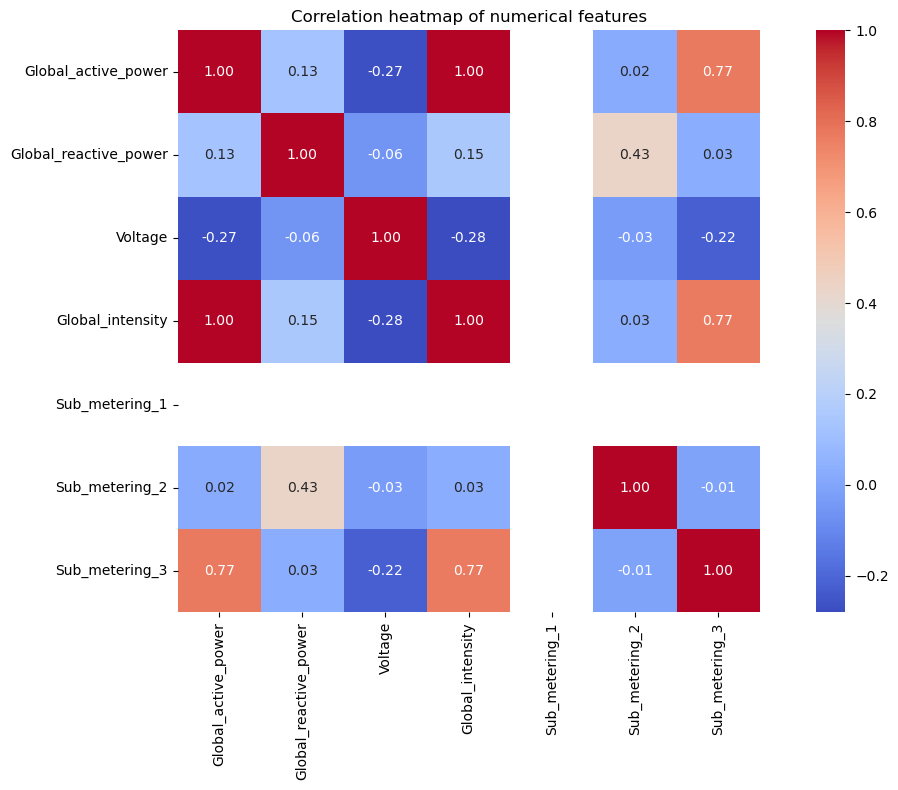

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 8))
corr_matrix = df[numerical_cols].corr()

sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', square = True)
plt.title('Correlation heatmap of numerical features')
plt.tight_layout()
plt.show()

In [4]:
corr_pairs = corr_matrix.unstack().sort_values(ascending = False)

filtered_corrs = corr_pairs[corr_pairs < 1]

filtered_corrs[::2].head(10)

Global_active_power    Global_intensity       0.998334
Sub_metering_3         Global_active_power    0.774873
Global_intensity       Sub_metering_3         0.765833
Global_reactive_power  Sub_metering_2         0.431984
                       Global_intensity       0.152032
                       Global_active_power    0.125109
Sub_metering_2         Global_intensity       0.034456
Global_reactive_power  Sub_metering_3         0.031698
Global_active_power    Sub_metering_2         0.022616
Sub_metering_3         Sub_metering_2        -0.008439
dtype: float64

## Features to DROP:
## Global_intensity (very high correlation with Global_active_power, ~0.998)

In [5]:
final_df = df.drop(['Global_intensity'], axis = 1)

In [9]:
final_df.to_csv('D:/ML Projects/Smart Energy Usage Pattern Detector/data/processed/selected_df.csv')

## Feature Scaling (Standardization)

In [6]:
selected_df = pd.read_csv('D:/ML Projects/Smart Energy Usage Pattern Detector/data/processed/selected_df.csv')

In [7]:
from sklearn.preprocessing import StandardScaler

numerical_features = final_df.select_dtypes(include = ['float64', 'int64']).columns

scaler = StandardScaler()
scaled_df = selected_df.copy()
scaled_df[numerical_features] = scaler.fit_transform(selected_df[numerical_features])

In [16]:
scaled_df.to_csv('D:/ML Projects/Smart Energy Usage Pattern Detector/data/processed/scaled_df.csv', index = False)

In [8]:
scaled_df = scaled_df.loc[:, ~scaled_df.columns.str.contains('^Unnamed')]

## Feature-Target Split

In [9]:
scaled_df = pd.read_csv('D:/ML Projects/Smart Energy Usage Pattern Detector/data/processed/scaled_df.csv')

In [11]:
scaled_df['datetime_combined'] = pd.to_datetime(scaled_df['datetime_combined'])

scaled_df['hour'] = scaled_df['datetime_combined'].dt.hour
scaled_df['day'] = scaled_df['datetime_combined'].dt.day
scaled_df['weekday'] = scaled_df['datetime_combined'].dt.weekday
scaled_df['month'] = scaled_df['datetime_combined'].dt.month
scaled_df['year'] = scaled_df['datetime_combined'].dt.year


scaled_df = scaled_df.drop(columns = ['datetime_combined'])

In [22]:
scaled_df.head()

,Unnamed: 0,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,all_zero_row,was_absent,hour,day,weekday,month,year,Global_active_power
6312,1300364,-1.166366,0.416337,0.0,-0.555282,1.653020,False,0.0,7,7,0,12,2009,1.788313
4425,1475695,-0.130412,-1.274235,0.0,-0.555282,-0.566104,False,0.0,20,6,3,5,2010,-0.065977
9876,655340,1.095820,-0.310249,0.0,-0.555282,0.790027,False,0.0,16,1,1,7,2008,0.296189
9637,500404,-0.151554,-0.461321,0.0,2.685994,-0.689389,False,0.0,14,24,6,2,2008,-0.767131
3233,821526,-0.489824,0.114193,0.0,-0.555282,-0.689389,False,0.0,15,7,4,11,2008,-0.570113


In [24]:
scaled_df = scaled_df.loc[:, ~scaled_df.columns.str.contains('^Unnamed')]

In [25]:
scaled_df.head()

,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,all_zero_row,was_absent,hour,day,weekday,month,year,Global_active_power
6312,-1.166366,0.416337,0.0,-0.555282,1.653020,False,0.0,7,7,0,12,2009,1.788313
4425,-0.130412,-1.274235,0.0,-0.555282,-0.566104,False,0.0,20,6,3,5,2010,-0.065977
9876,1.095820,-0.310249,0.0,-0.555282,0.790027,False,0.0,16,1,1,7,2008,0.296189
9637,-0.151554,-0.461321,0.0,2.685994,-0.689389,False,0.0,14,24,6,2,2008,-0.767131
3233,-0.489824,0.114193,0.0,-0.555282,-0.689389,False,0.0,15,7,4,11,2008,-0.570113


In [26]:
X = scaled_df.drop('Global_active_power', axis = 1)
y = scaled_df['Global_active_power']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 88
)

## Checking relationship between features and the target

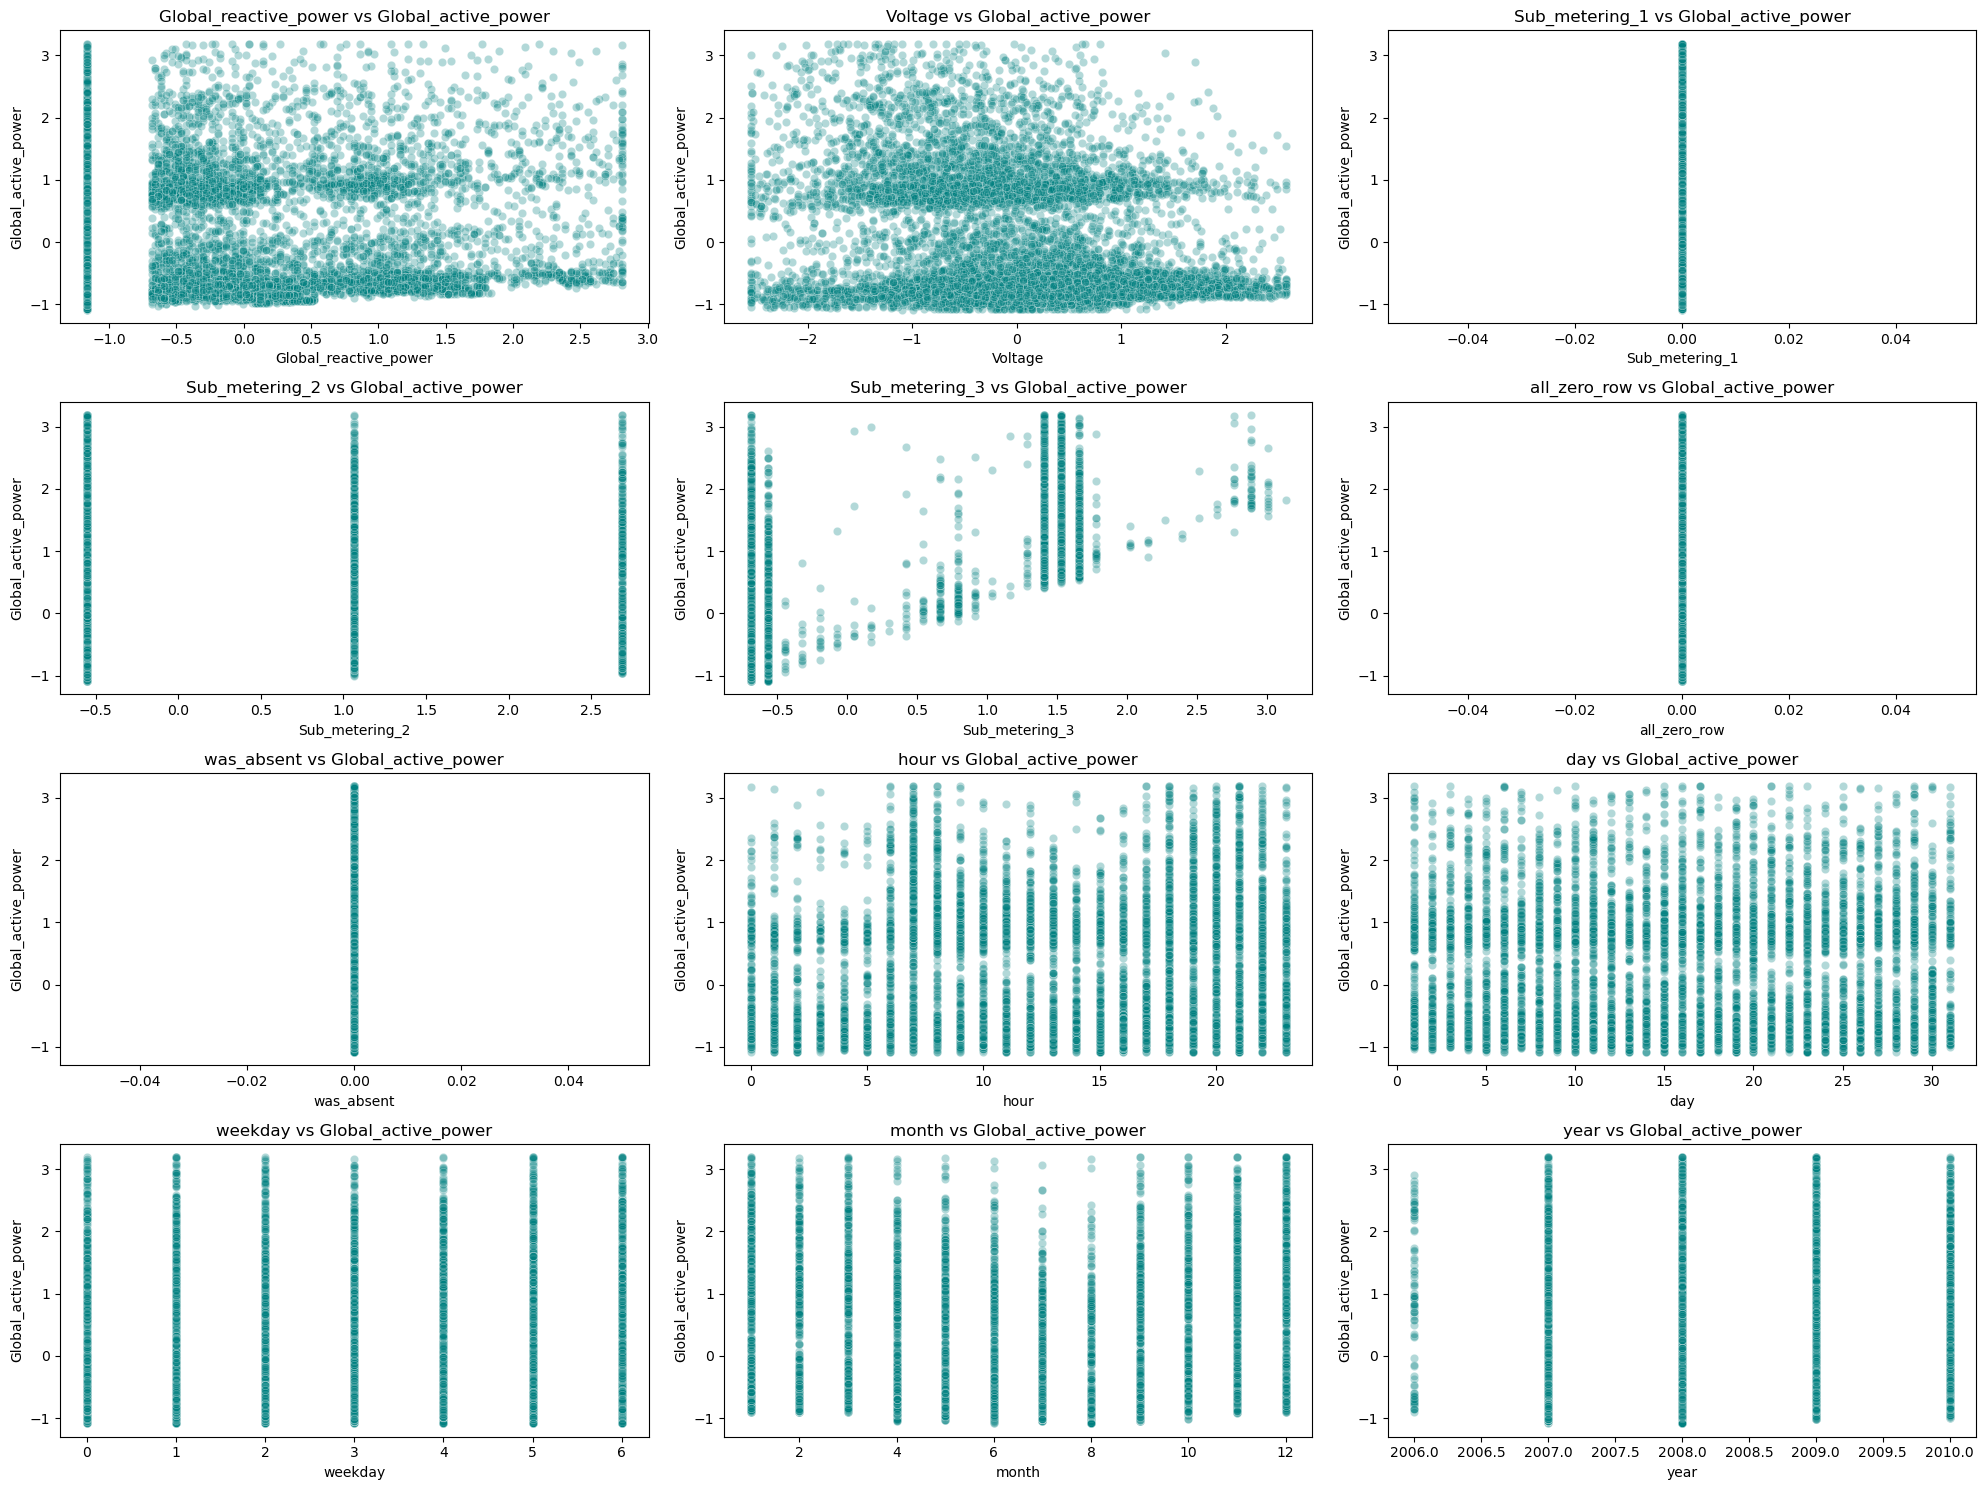

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample 10,000 rows randomly (adjust if needed)
scaled_df = X.copy()
scaled_df['Global_active_power'] = y
scaled_df = scaled_df.sample(n = 10000, random_state = 88)

plt.figure(figsize=(20, 15))
for i, col in enumerate(X.columns):
    plt.subplot(4, 3, i + 1)
    sns.scatterplot(x = scaled_df[col], y = scaled_df['Global_active_power'], alpha = 0.3, color = 'teal')
    plt.title(f'{col} vs Global_active_power')
    plt.xlabel(col)
    plt.ylabel('Global_active_power')

plt.tight_layout()
plt.show()

## Model Training.

In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 941 to 8996
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_reactive_power  8000 non-null   float64
 1   Voltage                8000 non-null   float64
 2   Sub_metering_1         8000 non-null   float64
 3   Sub_metering_2         8000 non-null   float64
 4   Sub_metering_3         8000 non-null   float64
 5   all_zero_row           8000 non-null   bool   
 6   was_absent             8000 non-null   float64
 7   hour                   8000 non-null   int32  
 8   day                    8000 non-null   int32  
 9   weekday                8000 non-null   int32  
 10  month                  8000 non-null   int32  
 11  year                   8000 non-null   int32  
dtypes: bool(1), float64(6), int32(5)
memory usage: 601.6 KB


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix

rf_model = RandomForestRegressor(n_estimators = 100, random_state = 88)

rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [34]:
y_pred = rf_model.predict(X_test)
y_pred

array([-0.78909288, -0.87424539, -0.59201656, ..., -0.83985409,
        0.87154026, -0.83110416], shape=(2000,))

## Model Evaluation.

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE: 0.2940
MSE: 0.2261
RMSE: 0.4755
R² Score: 0.7771


## Performance Visualization.

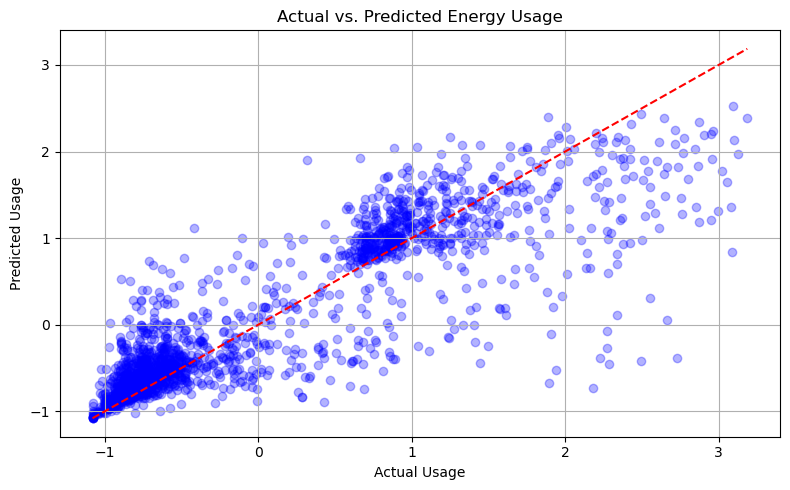

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 5))
plt.scatter(y_test, y_pred, alpha = 0.3, color = 'blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Usage")
plt.ylabel("Predicted Usage")
plt.title("Actual vs. Predicted Energy Usage")
plt.grid(True)
plt.tight_layout()
plt.show()

## Feature Importance (for Random Forest)

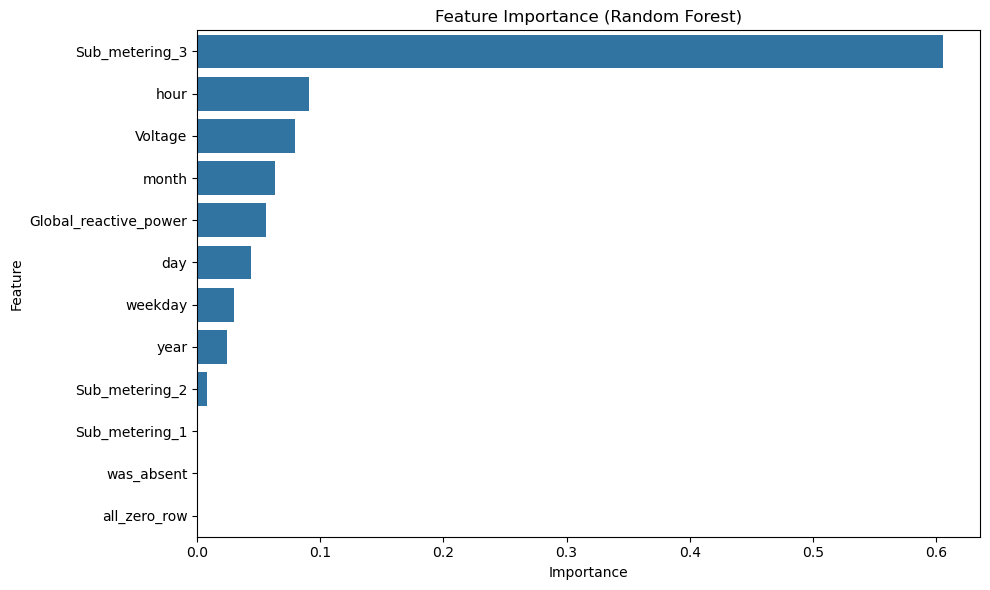

In [37]:
import seaborn as sns

feature_importances = rf_model.feature_importances_
features = X_train.columns

imp_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
imp_df = imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize = (10, 6))
sns.barplot(data = imp_df, x = 'Importance', y = 'Feature')
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()

## Testing with other regressors.

## 1.Linear Regressor

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


y_pred_lr = lr_model.predict(X_test)


mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression:\nMAE: {mae_lr:.4f}, MSE: {mse_lr:.4f}, RMSE: {rmse_lr:.4f}, R²: {r2_lr:.4f}")

Linear Regression:
MAE: 0.4159, MSE: 0.3731, RMSE: 0.6108, R²: 0.6323


## 2.Gradient Boosting Regressor

In [39]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators = 200, learning_rate = 0.1, max_depth = 4, random_state = 88)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting:\nMAE: {mae_gbr:.4f}, MSE: {mse_gbr:.4f}, RMSE: {rmse_gbr:.4f}, R²: {r2_gbr:.4f}")

Gradient Boosting:
MAE: 0.3024, MSE: 0.2351, RMSE: 0.4848, R²: 0.7683


## 3. XGBoost

In [40]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators = 200, learning_rate = 0.1, max_depth = 4, random_state = 88)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost:\nMAE: {mae_xgb:.4f}, MSE: {mse_xgb:.4f}, RMSE: {rmse_xgb:.4f}, R²: {r2_xgb:.4f}")

XGBoost:
MAE: 0.2992, MSE: 0.2335, RMSE: 0.4833, R²: 0.7698


## Insights

In [ ]:
"""
XGBoost performs best overall with the lowest error (MAE, MSE, RMSE) and highest R².

Gradient Boosting is very close, and sometimes preferable if training speed or interpretability matters.

Linear Regression performs significantly worse, showing that the relationship is likely nonlinear and benefits from boosting."""

## Hyperparameter Tuning.

In [44]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV


param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.4],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.1, 0.5, 1, 5]
}


xgb_model = XGBRegressor(random_state=88)


random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist,
    n_iter =3 0,
    scoring = 'r2',
    cv = 5,
    verbose = 2,
    random_state = 88,
    n_jobs = -1
)


random_search.fit(X_train, y_train)


best_xgb = random_search.best_estimator_


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = best_xgb.predict(X_test)

print("Tuned XGBoost Results:")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred) ** 0.5:.4f}")
print(f"R²: {r2_score(y_test, y_pred):.4f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Tuned XGBoost Results:
MAE: 0.2929
MSE: 0.2219
RMSE: 0.4710
R²: 0.7813


## Saving the best model.

In [ ]:
import joblib

joblib.dump(best_xgb, 'D:/ML Projects/Smart Energy Usage Pattern Detector/models/xgboost_best_model.pkl')

loaded_model = joblib.load('D:/ML Projects/Smart Energy Usage Pattern Detector/models/xgboost_best_model.pkl')

In [49]:
y_pred_loaded = loaded_model.predict(X_test)
y_pred_loaded

array([-0.5355702 , -0.84858453, -0.78622   , ..., -0.83958423,
        0.8412415 , -0.88512045], shape=(2000,), dtype=float32)

## Isolation Forest Model(Anomaly Detector)

In [51]:
scaled_df.head()

,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,all_zero_row,was_absent,hour,day,weekday,month,year,Global_active_power
3268,-1.166366,-0.939717,0.0,-0.555282,-0.689389,False,0.0,16,17,2,10,2007,-0.793207
62,-1.166366,0.013478,0.0,-0.555282,-0.689389,False,0.0,7,14,6,9,2008,-0.935176
3856,0.271285,1.948643,0.0,-0.555282,-0.689389,False,0.0,3,7,5,11,2009,-0.706287
4300,-0.214980,-1.637528,0.0,-0.555282,-0.689389,False,0.0,3,28,0,5,2007,-0.700493
2673,0.757549,-0.072849,0.0,-0.555282,-0.566104,False,0.0,1,24,4,7,2009,0.073094


In [53]:
input_df = scaled_df.copy()

input_df['timestamp'] = pd.to_datetime(dict(
    year = input_df['year'].astype(int),
    month = input_df['month'].astype(int),
    day = input_df['day'].astype(int),
    hour = input_df['hour'].astype(int)
))

In [57]:
input_df = input_df[['timestamp', 'Global_active_power']].copy()
input_df.columns = ['timestamp', 'usage']

input_df.to_csv('D:/ML Projects/Smart Energy Usage Pattern Detector/data/processed/input_df.csv', index = False)

In [60]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import joblib

df = pd.read_csv("D:/ML Projects/Smart Energy Usage Pattern Detector/data/processed/input_df.csv", parse_dates = ["timestamp"])
df.set_index("timestamp", inplace = True)

model = IsolationForest(contamination=0.05, random_state=42)
model.fit(df[["usage"]])

joblib.dump(model, "D:/ML Projects/Smart Energy Usage Pattern Detector/models/isolation_forest.pkl")

['D:/ML Projects/Smart Energy Usage Pattern Detector/models/isolation_forest.pkl']

## Time-series forecast model.

In [61]:
from prophet import Prophet
import pandas as pd
import joblib

df = pd.read_csv("D:/ML Projects/Smart Energy Usage Pattern Detector/data/processed/input_df.csv")
df = df.rename(columns = {"timestamp": "ds", "usage": "y"})

model = Prophet()
model.fit(df[["ds", "y"]])

joblib.dump(model, "D:/ML Projects/Smart Energy Usage Pattern Detector/models/prophet_model.pkl")

c:\Users\yashp\anaconda3\envs\gpu_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
13:59:37 - cmdstanpy - INFO - Chain [1] start processing
13:59:38 - cmdstanpy - INFO - Chain [1] done processing


['D:/ML Projects/Smart Energy Usage Pattern Detector/models/prophet_model.pkl']